<a href="https://colab.research.google.com/github/cantaruttim/Anemia/blob/main/Anemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset = pd.read_csv('anemia.csv', sep=",")
dataset

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
...,...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


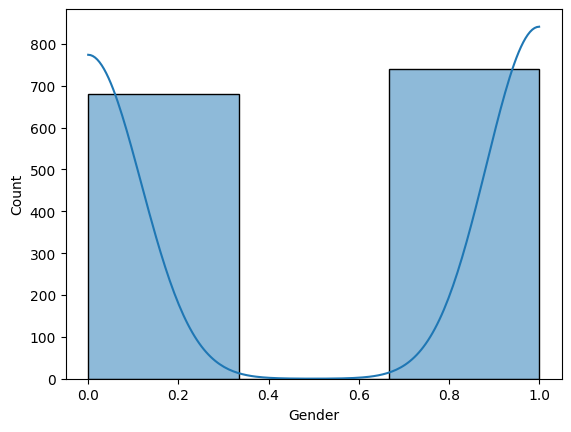

In [13]:
# Male = 0
# Femlae = 1
# proportion is not so different between groups

sns.histplot(dataset['Gender'], kde=True, bins=3);

#                 0                                 1

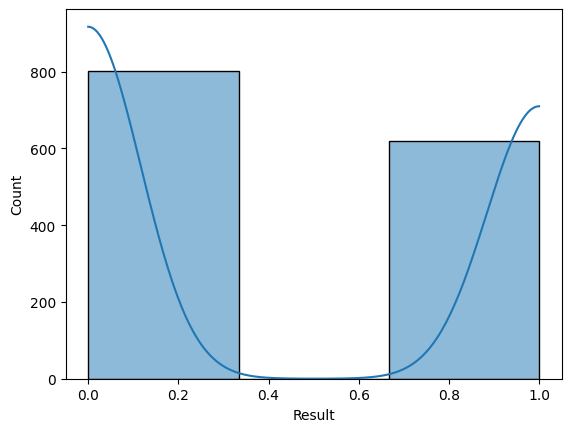

In [15]:
# Not anemic = 0
# Anemic = 1

sns.histplot(dataset['Result'], kde=True, bins=3);
#                 0                                   1

In [16]:
dataset.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


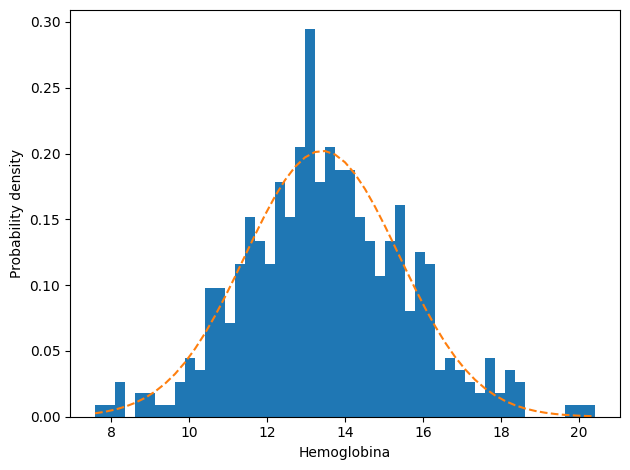

In [17]:
fig, ax = plt.subplots()

# example data
mu = 13.412738  # média da distribuição de Hemoglobina
sigma = 1.974546  # desvio padrão dos dados de mortalidade infantil
x = mu + sigma * np.random.randn(437)

num_bins = 50

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

ax.set_xlabel('Hemoglobina')
ax.set_ylabel('Probability density')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

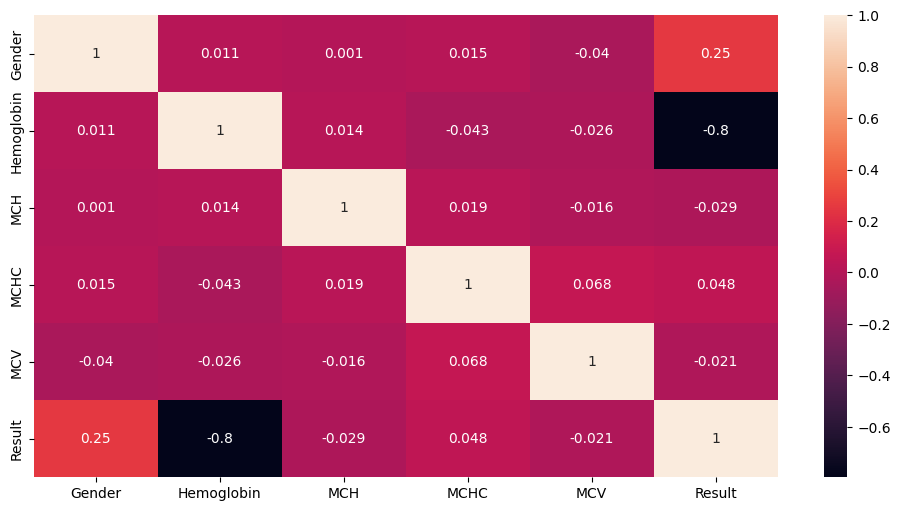

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot=True);

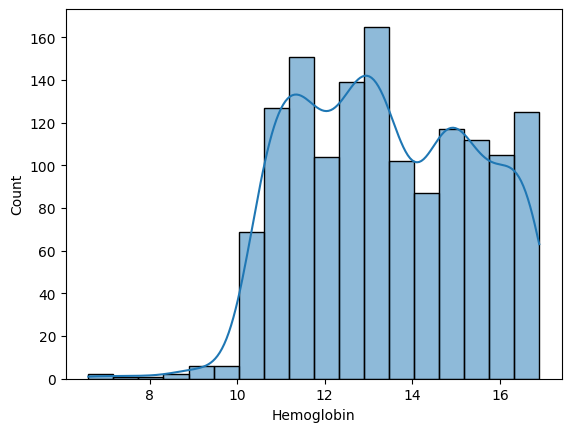

In [21]:
sns.histplot(dataset['Hemoglobin'], kde=True);

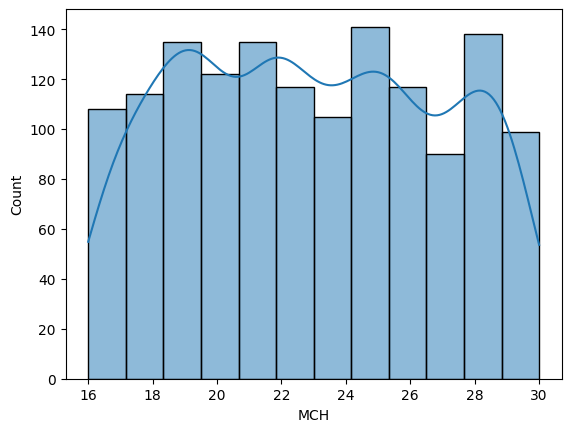

In [22]:
sns.histplot(dataset['MCH'], kde=True);

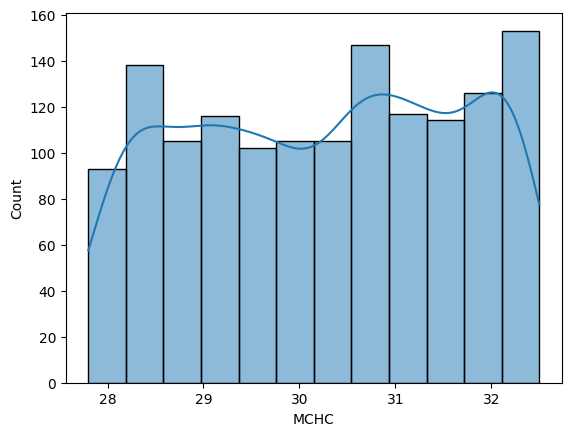

In [23]:
sns.histplot(dataset['MCHC'], kde=True);

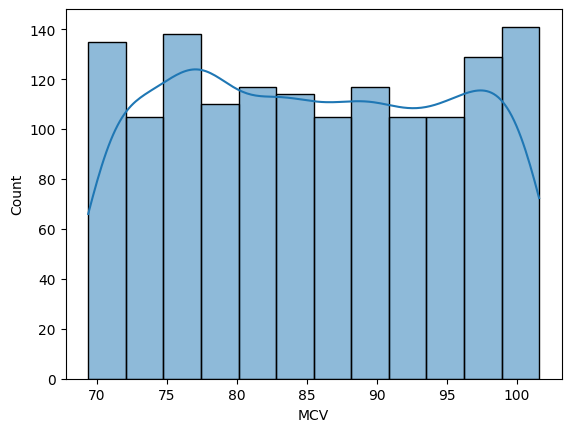

In [24]:
sns.histplot(dataset['MCV'], kde=True);

In [26]:
 """
        Uma das melhores evidências é a análise da hemácia quanto a concentração
        de Hemoglobina presente na célula consequentemente pessoas anêmicas terão uma menor
        proporção de hemoglobina presente na hemácia.

"""

'\n       Uma das melhores evidências é a análise da hemácia quanto a concentração \n       de Hemoglobina presente na célula consequentemente pessoas anêmicas terão uma menor\n       proporção de hemoglobina presente na hemácia.\n\n'

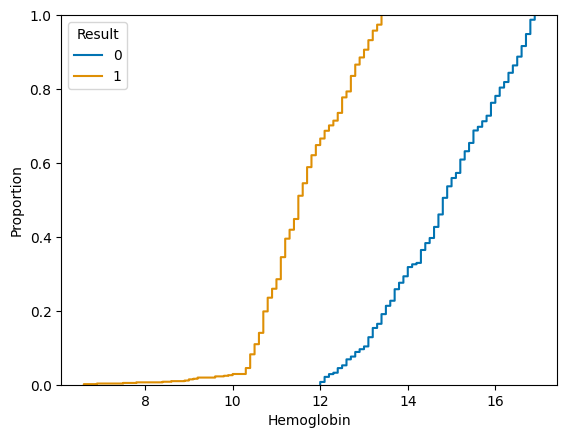

In [25]:
# resultado que mais se difereciou entre os positivos e os negativos
sns.ecdfplot(data=dataset, x="Hemoglobin", hue='Result',
            palette="colorblind");

Text(0.5, 1.0, 'mean corpuscular volume')

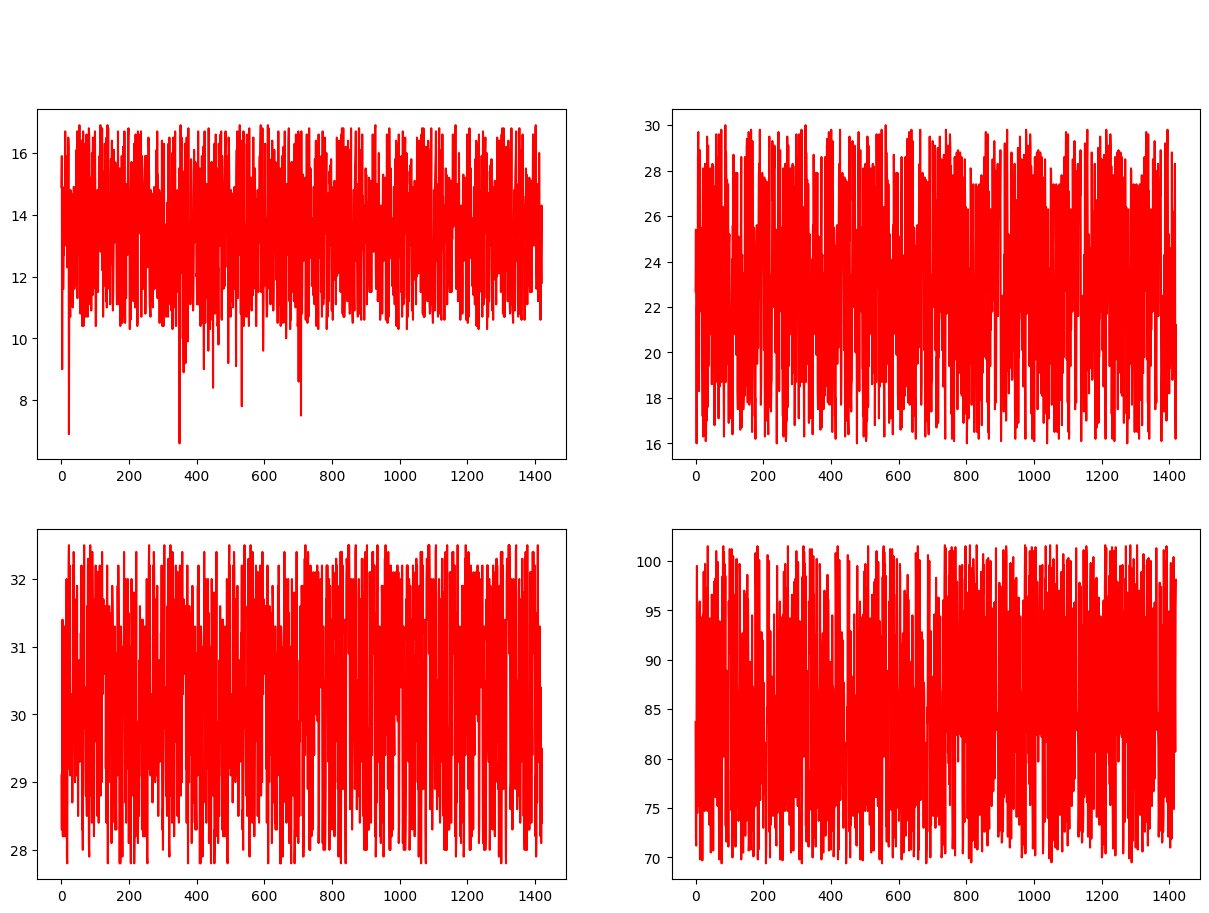

In [28]:
fig, ax = plt.subplots(ncols = 2, nrows=2, figsize=(15,10));
fig.suptitle("HB VARIATIONS", size=30, color='white')

ax[0, 0].plot(dataset['Hemoglobin'], color="red")
ax[0, 0].set_title("Hemoglobin", color='white', fontsize=15)

ax[0, 1].plot(dataset['MCH'], color="red")
ax[0, 1].set_title("mean corpuscular hemoglobin", color='white', fontsize=15)

ax[1, 0].plot(dataset['MCHC'], color="red")
ax[1, 0].set_title("mean corpuscular hemoglobin concentration", color='white', fontsize=15)


ax[1, 1].plot(dataset['MCV'], color="red")
ax[1, 1].set_title("mean corpuscular volume", color='white', fontsize=15)

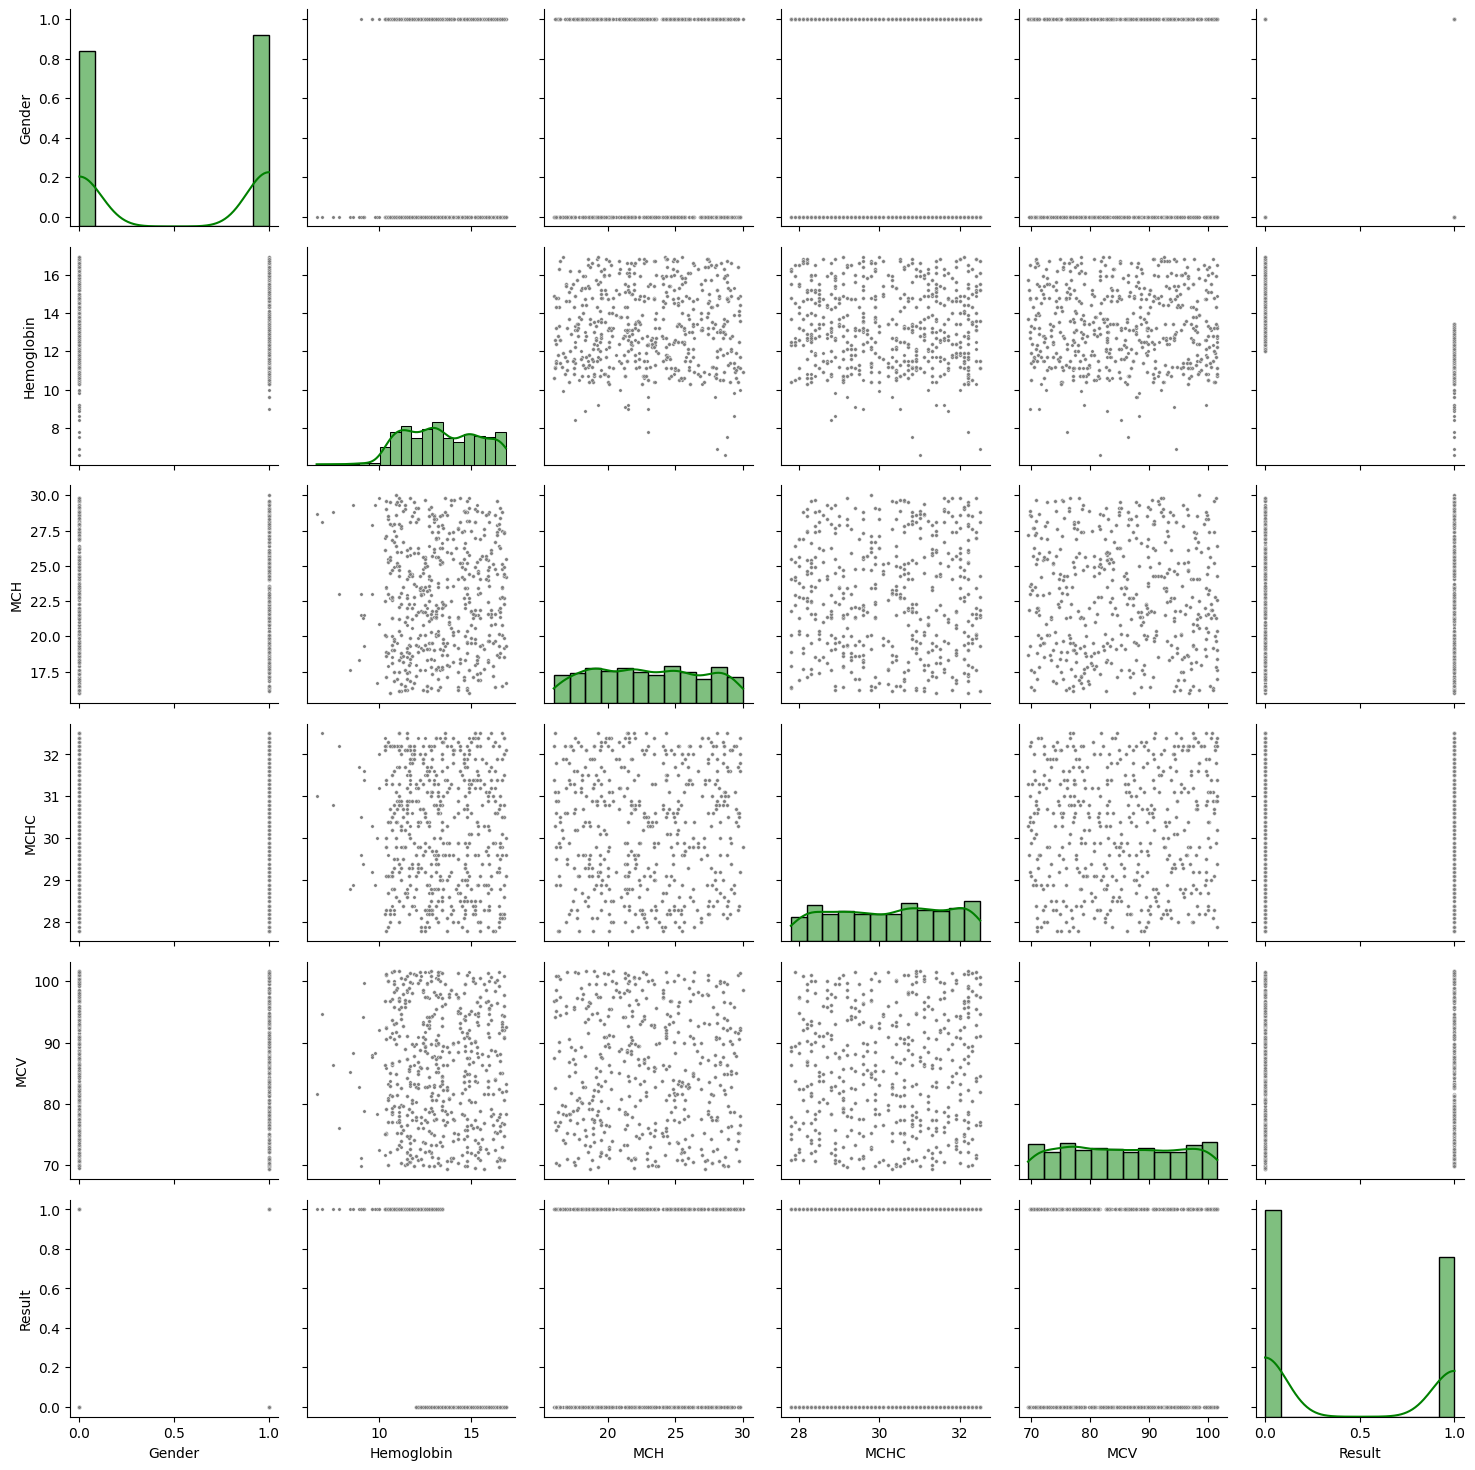

In [29]:
g = sns.PairGrid(dataset)
g.map_diag(sns.histplot, kde=True, color='Green')
g.map_offdiag(sns.scatterplot, color="gray", s=6);

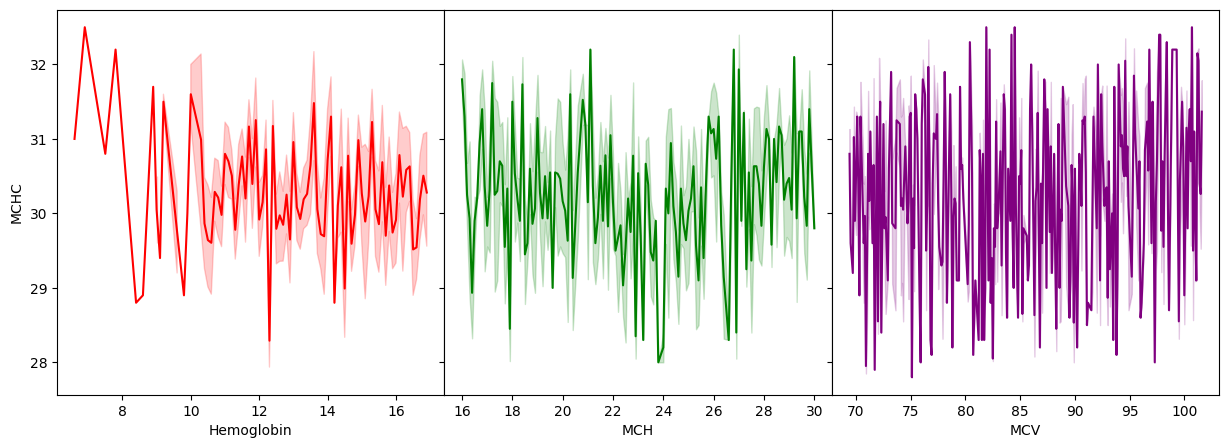

In [30]:
fig, ax = plt.subplots(ncols = 3, nrows=1, figsize=(15,5), sharex='col', sharey='row');
plt.subplots_adjust(wspace=0, hspace=0)

# Como as variáveis se relacionam com a Concentração de Hemoglobina
# Encontramos uma relação interessante entre Hemoglobina e o MCHC.
# Vamores baixos de Hb são seguidos de valores baixos de MCHC

sns.lineplot(ax=ax[0], data=dataset, x='Hemoglobin', y='MCHC', color='red');
sns.lineplot(ax=ax[1], data=dataset, x='MCH', y='MCHC', color='green');
sns.lineplot(ax=ax[2], data=dataset, x='MCV', y='MCHC', color='purple');

In [32]:
X = dataset.iloc[:, :5].values
X

array([[ 1. , 14.9, 22.7, 29.1, 83.7],
       [ 0. , 15.9, 25.4, 28.3, 72. ],
       [ 0. ,  9. , 21.5, 29.6, 71.2],
       ...,
       [ 1. , 13.1, 17.7, 28.1, 80.7],
       [ 0. , 14.3, 16.2, 29.5, 95.2],
       [ 0. , 11.8, 21.2, 28.4, 98.1]])

In [33]:
y = dataset.iloc[:, 5].values
y

array([0, 0, 1, ..., 1, 0, 1])

In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [42]:
from sklearn.model_selection import train_test_split
X_treinamento_var, X_teste_var, y_treinamento_var, y_teste_var = train_test_split(X, y, test_size=0.20, random_state=0)
X_treinamento_var.shape, X_teste_var.shape

((1136, 5), (285, 5))

In [43]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []
resultados_regressao = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, X_treinamento_var, y_treinamento_var, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest,X_treinamento_var, y_treinamento_var, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, X_treinamento_var, y_treinamento_var, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, X_treinamento_var, y_treinamento_var, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm,X_treinamento_var, y_treinamento_var,cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, X_treinamento_var, y_treinamento_var, cv = kfold)
  resultados_rede_neural.append(scores.mean())

0
1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2
3
4
5
6
7
8


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


9


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10
11
12
13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


14
15
16


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


17
18


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


19
20
21
22
23


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


24
25
26
27
28
29


In [44]:
np.max(resultados_arvore),  np.max(resultados_random_forest), np.max(resultados_knn), np.max(resultados_logistica), np.max(resultados_svm), np.max(resultados_rede_neural)

(1.0,
 1.0,
 0.8829684831547897,
 0.9920819748486259,
 0.9111085235211924,
 0.9489520260829065)

In [45]:
from sklearn import tree

clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(X_treinamento_var, y_treinamento_var)

[Text(0.6666666666666666, 0.875, 'x[1] <= 13.45\ngini = 0.494\nsamples = 1136\nvalue = [631, 505]\nclass = 0'),
 Text(0.5, 0.625, 'x[0] <= 0.5\ngini = 0.292\nsamples = 614\nvalue = [109, 505]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'x[1] <= 11.95\ngini = 0.48\nsamples = 273\nvalue = [109, 164]\nclass = 1'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 164\nvalue = [0, 164]\nclass = 1'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]\nclass = 0'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 341\nvalue = [0, 341]\nclass = 1'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 522\nvalue = [522, 0]\nclass = 0')]

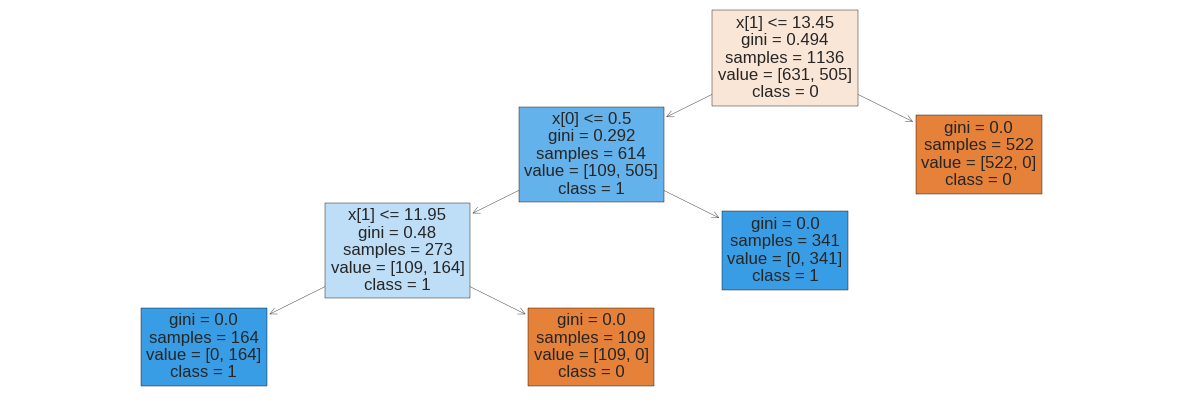

In [47]:
fig, axes = plt.subplots(figsize=(15,5), ncols=1, nrows=1)
tree.plot_tree(clf, class_names=['0', '1'], filled=True)

In [49]:
arvore = DecisionTreeClassifier(criterion='gini')
arvore.fit(X_treinamento_var, y_treinamento_var)

DecisionTreeClassifier()

1.0

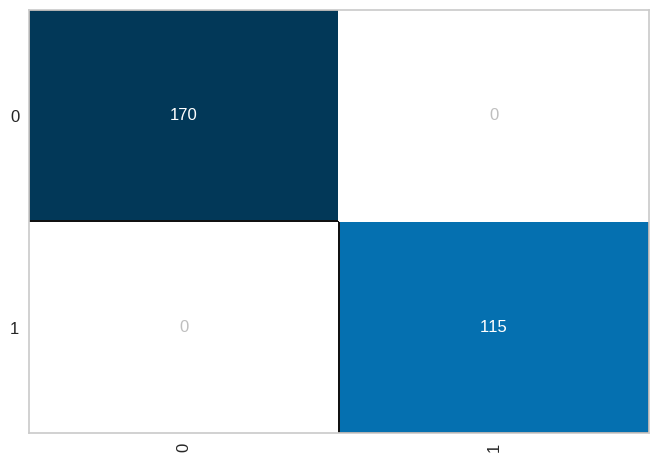

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(arvore,
                     cmap = 'PuBu')
cm.fit(X_treinamento_var, y_treinamento_var)
cm.score(X_teste_var, y_teste_var)

In [51]:
previsoes = arvore.predict(X_teste_var)
print(classification_report(y_teste_var, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       115

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [52]:
arvore.feature_importances_

array([0.08616561, 0.91383439, 0.        , 0.        , 0.        ])